# GD - Gradient Descent

## PyTorch Derivatives  (Gradients)

Pytorch has a built in way to calculate gradients. So, we don't need to worry about those calculus :D 

Let's study that.

In [1075]:
from fastai2.vision.all import *
from utils import *

matplotlib.rc('image', cmap='Greys')

In [1076]:
# Our function

def f(x): return x**2

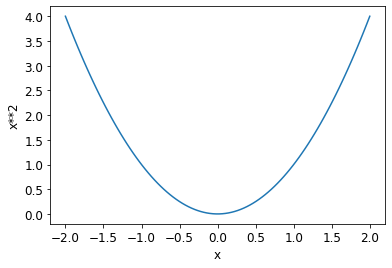

In [1077]:
plot_function(f, 'x', 'x**2')

In [1078]:
## Let's create gradient aware tensor
param_x = tensor(2.).requires_grad_()
param_x

tensor(2., requires_grad=True)

In [1079]:
## Let's apply our function
result = f(param_x)
result

tensor(4., grad_fn=<PowBackward0>)

In [1080]:
## Let's calculate gradients
result.backward()

In [1081]:
## Print the calculated gradient
param_x.grad

tensor(4.)

In [1082]:
## Reset the gradient, otherwise new operations will extend with the existing gradient
param_x.grad = None

In [1083]:
## Access the underline tensor
## Sometimes, we need to do some operations without altering gradient.
## In that case, we can use `.data` property
param_x.data

tensor(2.)

## Calculating SGD

For that we will use 7 step process:

![](./images/sgd-7-steps.jpg)

Before we follow these steps. Let's create some data set and create a model for that.

In [1084]:
x = torch.arange(0, 20).float()
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [1085]:
# y = 1 + torch.rand(20)* + (x-9.5)**2
y = torch.randn(20)*3 + 0.75*(x-9.5)**2 + 1
y

tensor([59.3827, 50.8113, 38.8920, 30.8661, 16.3313, 17.4354, 15.8951,  1.6301,  2.2966,  6.4529,  1.3900,  1.4940,  9.9361, 12.2377, 15.7727, 26.6467, 31.5197, 45.0289, 54.3516, 70.4530])

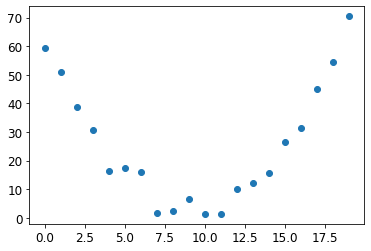

In [1086]:
plt.scatter(x, y)

Basically above dataset is same as the `f(x) = x**2` with some random data into that.<br/>
Then we have some real data to apply SGD.

### Step 1: Initialization

Here we initialize weights for our expected model. For this case, we think we can fit a `quadratic` function. That is to make things simple.

In [1087]:
def f(x_value, params):
    a, b, c = params;
    return a + b*x_value + c*x_value**2

In [1088]:
## Initializing params
tsr_params = torch.rand(3).requires_grad_()
tsr_params

tensor([0.1197, 0.5731, 0.7422], requires_grad=True)

### Step 2: Make a Prediction

Now we are going to apply the function we define and get a result

In [1089]:
preds = f(x, tsr_params)
preds

tensor([1.1966e-01, 1.4350e+00, 4.2348e+00, 8.5191e+00, 1.4288e+01, 2.1541e+01, 3.0279e+01, 4.0501e+01, 5.2207e+01, 6.5398e+01, 8.0074e+01, 9.6234e+01, 1.1388e+02, 1.3301e+02, 1.5362e+02, 1.7572e+02,
        1.9930e+02, 2.2437e+02, 2.5092e+02, 2.7895e+02], grad_fn=<AddBackward0>)

In [1090]:
## Let's visualize the prediction
def viz_pred(x, y, p):
    plt.scatter(x, y)
    plt.scatter(x, p.data, color="red")

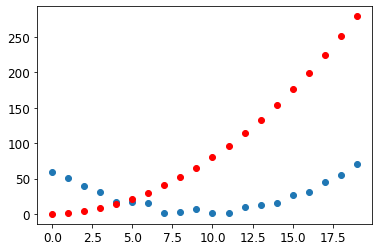

In [1091]:
viz_pred(x, y, preds)

Okay. It's bad :D <br/>
But we expected that right, since we initialize our weights randomly.

### Step 3: Find the Loss

Now we need to find a loss. It's a some sort different between real values and the prediction.
For that we are going to use `mean squired error`.

In [1092]:
## create the loss function
def mse(predictions):
    return ((y - predictions) ** 2).float().mean(0)

In [1093]:
## get the loss
loss = mse(preds)
loss

tensor(11977.9697, grad_fn=<MeanBackward1>)

### Step 4: Find Gradients

Here we get the prediction and apply the loss function. Now it's time to get the gradients based on those.

In [1094]:
loss.backward()

In [1095]:
grad = tsr_params.grad.clone()
grad

tensor([  143.5771,  2316.0010, 35907.8281])

As you can see, now we have gradients for all three params.

In [1096]:
## Let's clear the existing gradient
tsr_params.grad = None

### Step 5: Update Params with these Gradients

In [1097]:
## We need to do this step slowly. So, we use a learning rate and we can learn about this later.
lr = 1e-5

In [1098]:
tsr_params

tensor([0.1197, 0.5731, 0.7422], requires_grad=True)

In [1099]:
## Update params
tsr_params.data -= lr * grad
tsr_params

tensor([0.1182, 0.5500, 0.3832], requires_grad=True)

Here we use `tsr_params.data` because we don't want to update gradients because of this

### Step 6: Repeat

Now we run this process multiple times.<br/>
For now, let's run it once.

In [1100]:
preds = f(x, tsr_params)

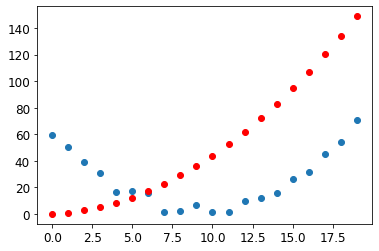

In [1101]:
viz_pred(x, y, preds)

See, it's has changed a bit.

In [1102]:
## Let's reset the above change and it should not affect our gradient calculation process.
tsr_params.grad = None

In [1103]:

## Let's create a function to rerun this with a single command:
def run_cycle(lr = 1e-5, log=False, print_loss=False):
    if log: print('')
    if log: print(f'params: {tsr_params}')
    preds = f(x, tsr_params)
    if log: print(f'preds: {preds}')
    loss = mse(preds)
    if log or print_loss: print(f'Loss: {loss}')
    loss.backward()
    if log: print(f'grad: {tsr_params.grad}')
    tsr_params.data -= tsr_params.grad.clone() * lr
    if log: print(f'params after: {tsr_params}')
    tsr_params.grad = None
    viz_pred(x, y, preds)

Loss: 2688.04931640625
Loss: 930.1094970703125
Loss: 597.4508666992188
Loss: 534.4990844726562
Loss: 522.5838623046875
Loss: 520.3265380859375
Loss: 519.8966064453125
Loss: 519.8125610351562
Loss: 519.7939453125
Loss: 519.7877197265625


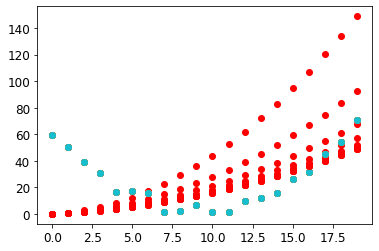

In [1104]:
for i in range(10):
    run_cycle(1e-5, print_loss=True)

Loss: 519.7838134765625


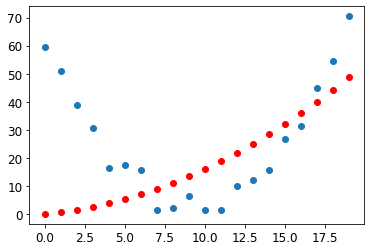

In [1105]:
run_cycle(3e-5, print_loss=True)